## 1. Imports

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Supporting file

In [3]:
current_dir = os.path.abspath('')

project_root = os.path.dirname(current_dir)
if project_root not in sys.path:
    sys.path.append(project_root)

from scripts.preprocessing import create_preprocessor
from scripts.model_utils import load_data, save_pipeline

## 2.Load Dataset

In [5]:
try:
    df = load_data('../data/raw/heart.csv')
    print("Raw data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: 'heart.csv' not found in 'data/raw/'.")
    print("Please ensure the raw data is in the '../data/raw' directory.")

Loading the data from ../data/raw/heart.csv....
Raw data loaded successfully.
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 3. Intial Data Analysis

In [7]:
print("\n=== Data Information ===")
df.info()

print("\n=== Check for Null values ===")
print(df.isnull().sum())


=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

=== Check for Null values ===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca   

## 4.Exploratory Data Aaalysis (EDA)


=== Descriptive Statistics ===
           count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0 

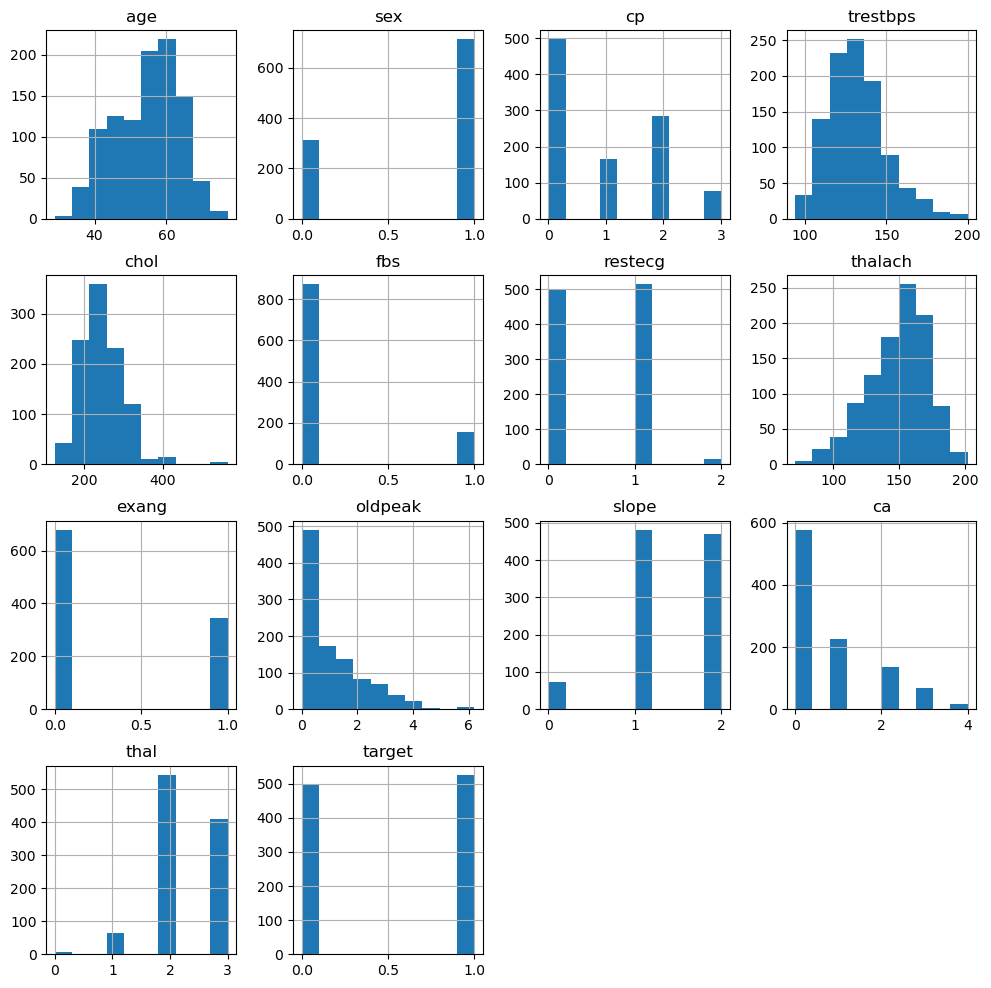


 === Crosstab for 'sex' and 'target' ===
target    0    1
sex             
0        86  226
1       413  300

 === Crosstab for 'cp' and 'target' ===
target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51

 === Crosstab for 'fbs' and 'target' ===
target    0    1
fbs             
0       417  455
1        82   71

 === Crosstab for 'restecg' and 'target' ===
target     0    1
restecg          
0        283  214
1        204  309
2         12    3

 === Crosstab for 'exang' and 'target' ===
target    0    1
exang           
0       225  455
1       274   71

 === Crosstab for 'slope' and 'target' ===
target    0    1
slope           
0        46   28
1       324  158
2       129  340

 === Crosstab for 'ca' and 'target' ===
target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15

 === Crosstab for 'thal' and 'target' ===
target    0    1
thal            
0         4    3
1     

In [9]:
print("\n=== Descriptive Statistics ===")
print(df.describe().T)

df.hist(figsize=(12, 12))
plt.show()

for column in df.columns:
    if df[column].nunique() < 10:
        print(f"\n === Crosstab for '{column}' and 'target' ===")
        print(pd.crosstab(df[column], df['target']))

## 5. Outlier Detection

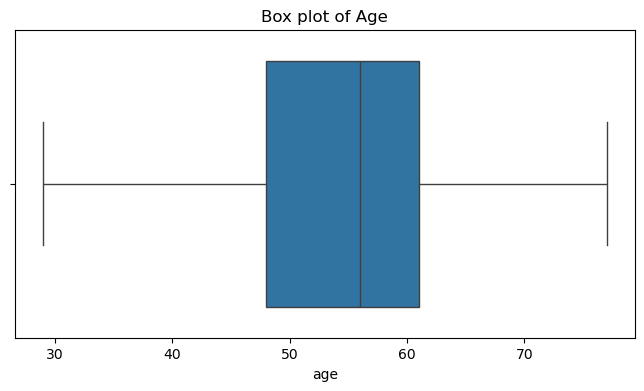

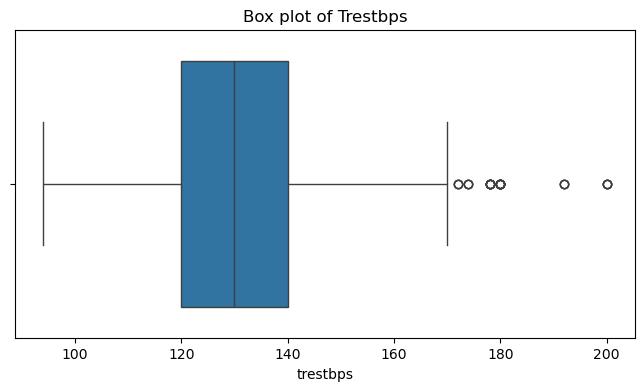

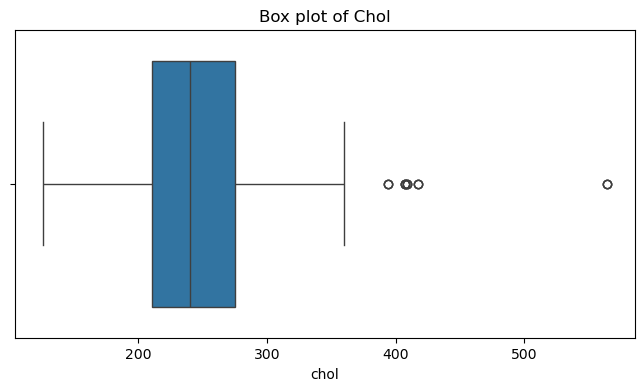

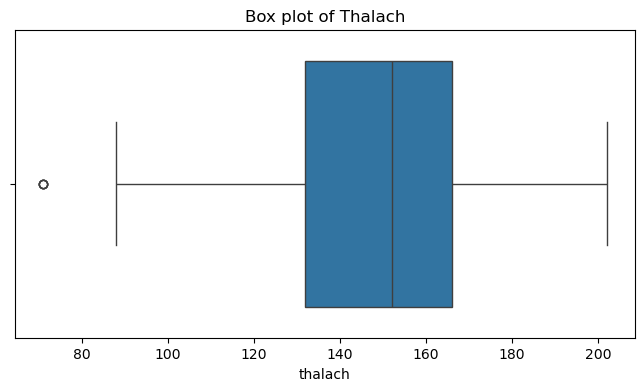

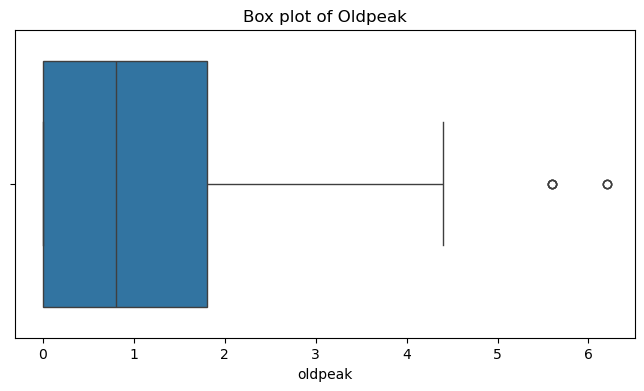

In [11]:
numerical_features= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column.capitalize()}")
    plt.show()

## 6. Correlation ANalysis


=== Correlation Matrix ===


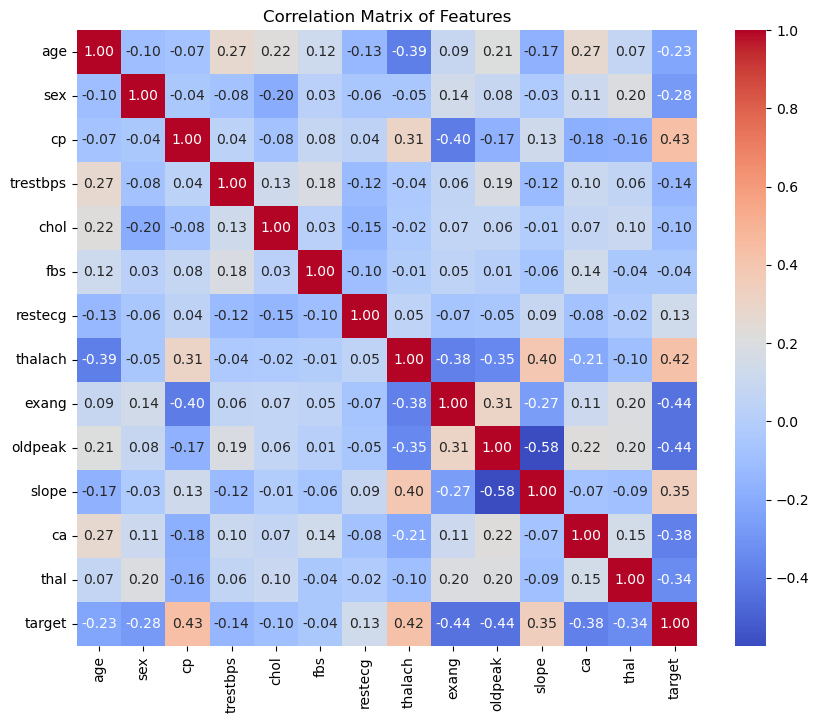

In [13]:
print("\n=== Correlation Matrix ===")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## 7. Pairplot Insights

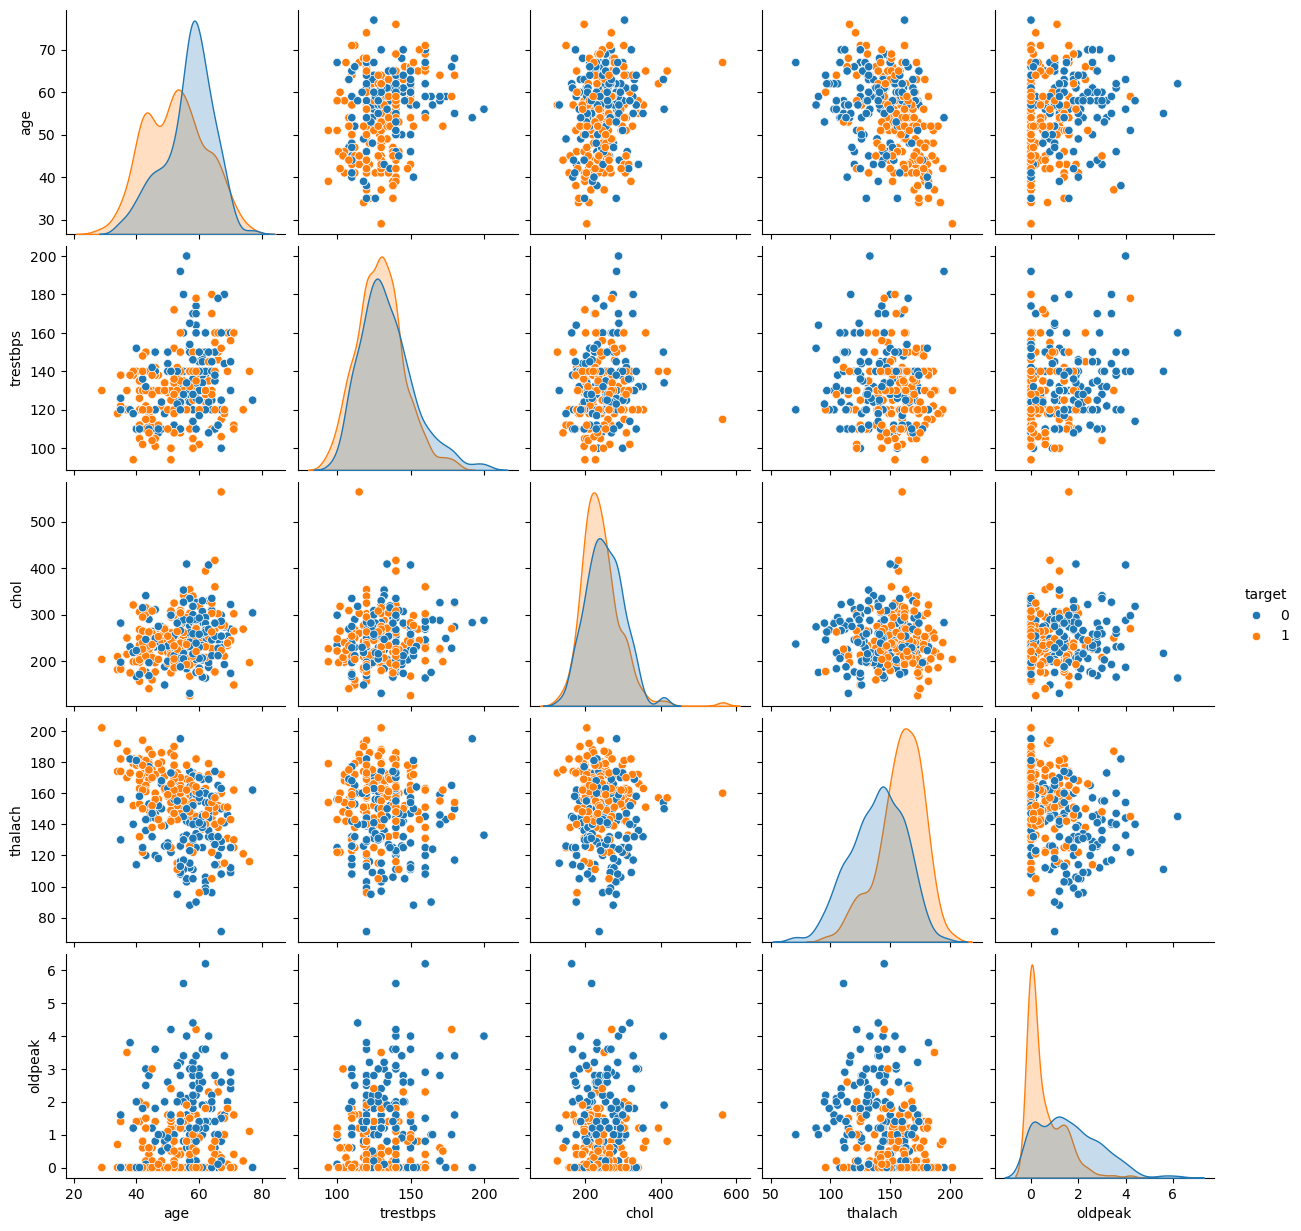

In [15]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(df[numerical_features + ['target']], hue='target')
plt.show()

## 8. Summary of Insights

### Summary of Data Exploration Findings

* **Data Integrity**: The dataset is clean with no missing values, which is a great starting point.
* **Feature Distributions**: Most numerical features show a normal-like distribution, but some (like **chol**, **trestbps**, and **thalach**) have some potential outliers that were visible in the box plots.
* **Correlations**: The correlation heatmap indicates that **cp** (chest pain type), **thalach** (maximum heart rate achieved), **exang** (exercise-induced angina), **oldpeak** (ST depression induced by exercise), and **ca** (number of major vessels) are highly correlated with the target variable, making them strong predictors for the model.